In [6]:
import pandas as pd
from datetime import timedelta
import cv2
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import dlib

In [2]:
import torch 
import matplotlib
import torch.nn as nn
import torch.nn.functional as F
import random
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb
import sklearn
from sklearn.model_selection import train_test_split
from PIL import Image
import torchvision.transforms as transforms

In [3]:
SAVING_FRAMES_PER_SECOND = 5 

In [4]:
FRAME_SAVE = 5 

In [12]:
def time_point(s):
    variable = str(s)
    try:
        variable, ms = variable.split(".")
    except ValueError:
        return variable + ".00".replace(":", "-")
    ms = int(ms)
    ms = round(ms / 1e4)
    return f"{variable}.{ms:02}".replace(":", "-")


def time_lasting(cap_get, fps):
    sec = []
    clip = cap_get.get(cv2.CAP_PROP_FRAME_COUNT) / cap_get.get(cv2.CAP_PROP_FPS)
    for i in np.arange(0, clip, 1 / fps):
        sec.append(i)
    return sec

In [13]:
def notes_time(videofile):
    FRAME_SAVE = 5 
    filename, _ = os.path.splitext(videofile)
    if not os.path.isdir(filename):
        os.mkdir(filename)   
    cap = cv2.VideoCapture(videofile)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frames_save = min(fps, FRAME_SAVE)
    frames_durat = time_lasting(cap, frames_save)
    count = 0
    while True:
        is_read, frame = cap.read()
        if not is_read:
            break
        frame_duration = count / fps
        try:
            closest_duration = frames_durat[0]
        except IndexError:
            break
        if frame_duration >= closest_duration:
            frame_duration_formatted = time_point(timedelta(seconds=frame_duration))
            cv2.imwrite(os.path.join(filename, f"frame{frame_duration_formatted}.jpg"), frame) 
            try:
                frames_durat.pop(0)
            except IndexError:
                pass
        count += 1

In [14]:
data = [f for f in os.listdir('../../Test003/AAA1/') if os.path.isfile(f) and f.endswith(".mp4")]

In [15]:
for i in range(len(data)):
    videofile = sys.argv[1]
    notes_time(data[i])

In [10]:
my_photo = cv2.imread('../../Test003/AAA1/ich-cv/frame0-00-00.26.jpg')
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(my_photo, -1, kernel)
cv2.imshow('MyPhoto', im )
cv2.waitKey(0)
cv2.destroyAllWindows()

32

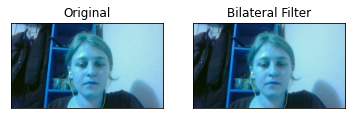

In [11]:
img = cv2.imread(r'C:\Users\Alexandra\Test003\AAA1\ich-cv\frame0-00-00.26.jpg',1) 
 
kernel = np.ones((5,5),np.float32)/25 
blur = cv2.bilateralFilter(img,9,75,75) 
plt.subplot(121),plt.imshow(img),plt.title('Original') 
plt.xticks([]), plt.yticks([]) 
plt.subplot(122),plt.imshow(blur),plt.title('Bilateral Filter') 
plt.xticks([]), plt.yticks([]) 
cv2.imshow("Image",blur) 
cv2.waitKey(0)

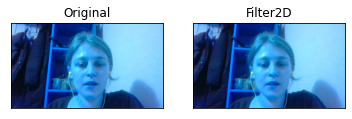

32

In [12]:
img = cv2.imread(r'C:\Users\Alexandra\Test003\AAA1\ich-cv\frame0-00-00.45.jpg') 
 
kernel = np.ones((5,5),np.float32)/25 
dst = cv2.filter2D(img,-1,kernel) 
plt.subplot(121),plt.imshow(img),plt.title('Original') 
plt.xticks([]), plt.yticks([]) 
plt.subplot(122),plt.imshow(dst),plt.title('Filter2D') 
plt.xticks([]), plt.yticks([]) 
plt.show() 
cv2.waitKey(0)

In [13]:
  
# Reading the image
image = cv2.imread(r'C:\Users\Alexandra\Test003\AAA1\ich-cv\frame0-00-00.45.jpg')
  
# Creating the kernel(2d convolution matrix)
kernel1 = np.ones((5, 5), np.float32)/30
  
# Applying the filter2D() function
img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)
  
cv2.imshow('Original', image)
cv2.imshow('Kernel Blur', img)
  
cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
images_lip = []
images = os.listdir('../../Test003/AAA1/' + "/" + "ich-opencv")
kernel1 = np.ones((5, 5), np.float32)/30
for i in range(len(images)):
    image = cv2.imread(r'../../Test003/AAA1/' + "/" + "ich-opencv" + "/" + images[i])
    imgg = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)
    images_lip.append(imgg)

In [17]:
cv2.imshow("Image",images_lip[1]) 
cv2.waitKey()

32

In [18]:
images_lip[0]

array([[[147, 167, 202],
        [147, 167, 201],
        [145, 167, 201],
        ...,
        [134, 172, 198],
        [134, 172, 198],
        [134, 172, 198]],

       [[146, 167, 201],
        [146, 167, 201],
        [144, 167, 201],
        ...,
        [134, 173, 198],
        [134, 173, 198],
        [134, 173, 198]],

       [[145, 167, 201],
        [144, 167, 201],
        [143, 167, 200],
        ...,
        [134, 173, 199],
        [134, 173, 199],
        [135, 173, 199]],

       ...,

       [[ 20,  29,  52],
        [ 20,  29,  52],
        [ 21,  30,  52],
        ...,
        [110, 146, 195],
        [110, 147, 196],
        [110, 147, 196]],

       [[ 20,  29,  52],
        [ 20,  29,  52],
        [ 21,  30,  52],
        ...,
        [109, 146, 195],
        [110, 146, 195],
        [110, 146, 196]],

       [[ 20,  29,  52],
        [ 20,  29,  52],
        [ 21,  30,  52],
        ...,
        [109, 146, 195],
        [110, 146, 195],
        [110, 146, 196]]

In [19]:
data = [f for f in os.listdir('../../Test003/AAA1/') if os.path.isfile(f) and f.endswith(".mp4")]
print(data[2])

ich.mp4


In [20]:
for i in range(len(data)):
    videofile = sys.argv[1]
    notes_time(data[i])

In [21]:
images_lip = []
images = os.listdir('../../Test003/AAA1/' + "/" + "ich-opencv")
for i in range(len(images)):
    img = cv2.imread('../../Test003/AAA1/' + "/" + "ich-opencv" + "/" + images[i])
    images_lip.append(img)

In [23]:
#images_lip = []
#img_rgb = []
#images = os.listdir('../../Test003/AAA1/' + "/" + "ich-opencv")
#for i in range(len(images)):
#    img = cv2.imread('../../Test003/AAA1/' + "/" + "ich-opencv" + "/" + images[i])
#    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#    images_lip.append(img_rgb)   

In [24]:
#from PIL import Image

In [25]:
#images_lip222 = IMAGE.convert('RGB')

In [26]:
#img_bgr = cv2.imread('../../Test003/AAA1/' + "/" + "ich-opencv" + "/" + images[1])
#cv2.imshow('BGR Image',img_bgr)
#img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#cv2.imshow('RGB Image',img_rgb )
#cv2.waitkey(0)

In [27]:
#self.images.append((Image.fromarray(f_processed, dtype=np.float32).convert('RGB') / 255.)

In [28]:
#imagep2 = cv2.imread('../../Test003/AAA1/' + "/" + "ich-opencv" + "/" + images).convert("RGB")

In [29]:
#.convert('RGB')

In [46]:
#IMAGG = [t.detach().numpy() for t in IMAGE]

In [47]:
#nop = []
#IMAGE = []
#for i in range(len(images_lip)):
#    nop = np.hstack(images_lip[i])
#    IMAGE.append(torch.FloatTensor(nop))
#    nop = []

In [48]:
#nop = []
#IMAGE = []
#for i in range(len(images_lip)):
##    nop = np.array(images_lip[i])
#    IMAGE.append(torch.FloatTensor(nop))
#    nop = []

In [22]:
nop = []
IMAGE = []
for i in range(len(images_lip)):
    nop = images_lip[i]
    IMAGE.append(nop)
    nop = []

In [23]:
IMAGE[0].shape

(720, 1280, 3)

In [25]:
dot_lip = []
lip_plop = []
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
images = os.listdir('../../Test003/AAA1/' + "/" + "ich-opencv")
for k in range(len(images)):
    img = cv2.imread('../../Test003/AAA1/' + "/" + "ich-opencv" + "/" + images[k])
    gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face in faces:
        x1 = face.left()
        y1 = face.top() 
        x2 = face.right() 
        y2 = face.bottom()

        landmarks = predictor(image=gray, box=face)    
    
        for n in range(48, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            name = (x,y)
            lip_plop.append(name)
        dot_lip.append(lip_plop)
        lip_plop = []

In [26]:
len(dot_lip[0])

20

In [33]:
df = pd.read_csv('pacset_1.csv')

In [27]:
abcd = df

In [28]:
df = pd.DataFrame(columns = ['frames','label','abc'])

In [29]:
df['frames'] = images_lip
df['label'] = dot_lip
df['abc'] = abcd

In [30]:
df.head(7)

,frames,label,abc
0,"[[[180, 202, 244], [179, 201, 243], [176, 200,...","[(609, 520), (634, 504), (656, 495), (672, 499...",1
1,"[[[132, 195, 255], [132, 195, 255], [133, 195,...","[(611, 524), (633, 504), (656, 493), (671, 497...",2
2,"[[[139, 200, 240], [139, 200, 240], [139, 200,...","[(609, 522), (634, 506), (656, 496), (671, 500...",1
3,"[[[145, 193, 241], [145, 193, 241], [144, 192,...","[(613, 522), (635, 503), (656, 493), (672, 496...",2
4,"[[[147, 206, 246], [143, 204, 244], [138, 203,...","[(610, 518), (635, 504), (656, 495), (671, 499...",3
5,"[[[140, 202, 238], [141, 201, 237], [143, 201,...","[(608, 517), (633, 504), (655, 494), (670, 498...",3
6,"[[[164, 201, 239], [164, 201, 239], [162, 201,...","[(607, 517), (633, 504), (655, 495), (670, 499...",3


In [26]:
bam = dot_lip

In [27]:
for i in range(len(bam)):
    bam[i].append(abcd[i])

In [28]:
bam[0]

[(609, 520),
 (634, 504),
 (656, 495),
 (672, 499),
 (688, 495),
 (709, 503),
 (733, 517),
 (709, 532),
 (689, 537),
 (672, 539),
 (656, 537),
 (634, 532),
 (621, 519),
 (655, 511),
 (672, 512),
 (687, 511),
 (723, 517),
 (688, 518),
 (672, 519),
 (656, 517),
 1]

In [29]:
df2 = pd.DataFrame(columns = ['frames','label'])

In [30]:
df2['frames'] = images_lip
df2['label'] = dot_lip

In [31]:
df2.head()

,frames,label
0,"[[[180, 202, 244], [179, 201, 243], [176, 200,...","[(609, 520), (634, 504), (656, 495), (672, 499..."
1,"[[[132, 195, 255], [132, 195, 255], [133, 195,...","[(611, 524), (633, 504), (656, 493), (671, 497..."
2,"[[[139, 200, 240], [139, 200, 240], [139, 200,...","[(609, 522), (634, 506), (656, 496), (671, 500..."
3,"[[[145, 193, 241], [145, 193, 241], [144, 192,...","[(613, 522), (635, 503), (656, 493), (672, 496..."
4,"[[[147, 206, 246], [143, 204, 244], [138, 203,...","[(610, 518), (635, 504), (656, 495), (671, 499..."


In [32]:
df.apply(list, axis=1)

0    [[[[180 202 244], [179 201 243], [176 200 242]...
1    [[[[132 195 255], [132 195 255], [133 195 255]...
2    [[[[139 200 240], [139 200 240], [139 200 240]...
3    [[[[145 193 241], [145 193 241], [144 192 240]...
4    [[[[147 206 246], [143 204 244], [138 203 242]...
5    [[[[140 202 238], [141 201 237], [143 201 237]...
6    [[[[164 201 239], [164 201 239], [162 201 239]...
dtype: object

In [33]:
images_lip_2 = []
images = os.listdir('../../Test003/AAA1/' + "/" + "ich-opencv")
readPath = r'../../Test003/AAA1/' + "/" + "ich-opencv"
for i in range(len(images)):
    image = Image.open(readPath + "/" + images[i])
    transform = transforms.ToTensor()
    images_lip_2.append(transform(image))

In [34]:
images_lip_2[0]

tensor([[[0.9569, 0.9529, 0.9490,  ..., 0.9333, 0.9333, 0.9333],
         [0.9569, 0.9529, 0.9451,  ..., 0.9333, 0.9333, 0.9333],
         [0.9529, 0.9490, 0.9451,  ..., 0.9333, 0.9333, 0.9333],
         ...,
         [0.2431, 0.2431, 0.2471,  ..., 0.9176, 0.9216, 0.9216],
         [0.2431, 0.2431, 0.2471,  ..., 0.9176, 0.9216, 0.9216],
         [0.2392, 0.2431, 0.2471,  ..., 0.9176, 0.9216, 0.9216]],

        [[0.7882, 0.7882, 0.7843,  ..., 0.8118, 0.8118, 0.8118],
         [0.7922, 0.7882, 0.7804,  ..., 0.8118, 0.8118, 0.8118],
         [0.7882, 0.7843, 0.7804,  ..., 0.8118, 0.8118, 0.8118],
         ...,
         [0.1373, 0.1373, 0.1412,  ..., 0.6863, 0.6902, 0.6902],
         [0.1373, 0.1373, 0.1412,  ..., 0.6863, 0.6902, 0.6902],
         [0.1333, 0.1373, 0.1412,  ..., 0.6863, 0.6902, 0.6902]],

        [[0.7137, 0.7020, 0.6902,  ..., 0.6314, 0.6314, 0.6314],
         [0.7059, 0.7020, 0.6863,  ..., 0.6314, 0.6314, 0.6314],
         [0.6941, 0.6902, 0.6824,  ..., 0.6314, 0.6314, 0.

In [31]:
plop = []
nana_2 = []
for i in range(len(dot_lip)):
    plop = np.hstack(dot_lip[i])
    plop = np.array(plop)
    nana_2.append(torch.FloatTensor(plop))
    plop = []

In [32]:
nana_2[3]

tensor([613., 522., 635., 503., 656., 493., 672., 496., 687., 492., 709., 502.,
        731., 518., 708., 535., 688., 542., 672., 544., 656., 543., 635., 536.,
        625., 521., 656., 508., 672., 509., 687., 508., 720., 518., 687., 523.,
        672., 524., 656., 523.])

In [37]:
#plplop = np.array(nana_2)

In [33]:
okii = [t.numpy() for t in nana_2]

In [35]:
ploplop = [t.numpy() for t in nana_2]
print(ploplop[0])

[609. 520. 634. 504. 656. 495. 672. 499. 688. 495. 709. 503. 733. 517.
 709. 532. 689. 537. 672. 539. 656. 537. 634. 532. 621. 519. 655. 511.
 672. 512. 687. 511. 723. 517. 688. 518. 672. 519. 656. 517.]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(IMAGE, abcd,  test_size=0.3,  random_state = 16)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(IMAGE, nana_2,  test_size=0.3,  random_state = 16)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(nana_2, abcd,  test_size=0.3,  random_state = 16)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(okii, abcd,  test_size=0.5,  random_state = 16)

In [37]:
print(okii[0])
print(abcd[0])

[609. 520. 634. 504. 656. 495. 672. 499. 688. 495. 709. 503. 733. 517.
 709. 532. 689. 537. 672. 539. 656. 537. 634. 532. 621. 519. 655. 511.
 672. 512. 687. 511. 723. 517. 688. 518. 672. 519. 656. 517.]
1


In [42]:
#print(X_train)
#print(y_train)

In [58]:
#X_train = X_train.float()
#X_test = X_test.float()

In [285]:
#X_train.dtype, X_test.dtype

In [286]:
#X_train.shape, X_test.shape

In [287]:
#y_test = np.array(y_test)
#y_train = np.array(y_train)

In [288]:
#y_test = y_test.float()
#y_train = y_train.float()

In [289]:
#y_test.shape, y_train.shape

In [290]:
#X_train.shape, X_test.shape

In [62]:
#[t.numpy() for t in my_list_of_tensors]

In [64]:
X_train = [t.numpy() for t in X_train]
X_test = [t.numpy() for t in X_test]

In [43]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
#X_train = np.true_divide(X_train, 255.)
#X_test = np.true_divide(X_test, 255.)
#print(X_train)

In [2347]:
#print(X_train[0])
#train = np.true_divide(X_train, 255.)
#print(train[0])
#train = np.true_divide(X_train, 1.)
#print(train[0])

In [68]:
y_train = [t.numpy() for t in y_train]
y_test = [t.numpy() for t in y_test]

In [45]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)
#X_train = np.true_divide(X_train, 255.)
#X_test = np.true_divide(X_test, 255.)
print(y_test[0])

tensor(2.)


In [47]:
y_train = np.array(y_train)
print(y_train[0])
y_test = np.array(y_test)
y_train = torch.FloatTensor(y_train)
print(y_train[0])
y_test = torch.FloatTensor(y_test)
#y_train = np.true_divide(y_train, 255.)
#print(y_train[0])
#y_test = np.true_divide(y_test, 255.)

1.0
tensor(1.)


In [49]:
from torch.utils.data import TensorDataset, DataLoader
import os

In [50]:
batch_size = 512
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_test, y_test)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [103]:
#vop = X_train.unsqueeze(-1)
#X_test = X_test.unsqueeze(-1)
#vop.shape

In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [85]:
#Нейронная сеть для определения 20 точек губ

In [1581]:
class File(torch.nn.Module):
    def __init__(self):
        super(File, self).__init__()
        
        self.drop = torch.nn.Dropout(p=0.2)
        self.prelu = torch.nn.PReLU()
        self.conv = nn.Conv2d(720, 4, kernel_size=(4, 3), bias=False)
        self.pool = nn.MaxPool2d(1, 2)
        self.conv1 = nn.Conv1d(4, 4, 639, bias=False)
        self.pool1 = nn.MaxPool1d(1, 2) 
        self.conv2 = nn.Conv1d(4, 4, 306, bias=False)
        self.conv3 = nn.Conv1d(4, 4, 212, bias=False)
        self.fc1 = torch.nn.Linear(959,612)
        self.fc2 = torch.nn.Linear(96,40)  
        
        
    def forward(self, x):
        x = self.drop(x)            
        x = self.prelu(self.conv(x))
        x = self.pool(x)
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x = self.prelu(self.conv1(x))
        x = self.pool1(x)
        x = self.fc1(x)
        x = self.drop(x)  
        x = self.prelu(self.conv2(x))
        x = self.prelu(self.conv3(x))
        x = self.fc2(x*100)
        x = torch.round(x)
        return x

    
neur = File()
pred = neur(X_train)
print(pred[0])

tensor([-218.,   41.,  156.,    0.,  -69., -113.,  109.,   26.,   -5.,  -25.,
        -193., -114.,   32.,   25.,  121.,  124.,  -50.,  -31.,  316.,   -0.,
        -123., -230.,  312.,   26.,   94.,  -55., -270., -232.,  -14.,  170.,
         305., -279.,  158.,    6.,  114., -348.,   43.,  -65.,  -90.,   -5.],
       grad_fn=<SelectBackward0>)


In [666]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [667]:
def get_test_loss(net, criterion, data_loader):
    testing_loss = []
    with torch.no_grad():
        for data in data_loader:
            inputs, labels = data
            inputs, labels = X_test.to(device), y_test.to(device)
            outputs = neur(inputs)
            outputs = outputs.view(outputs.size(0)* outputs.size(1))
            labels = labels.type(torch.LongTensor)
            loss = criterion(outputs, labels)
            testing_loss.append(loss.item())
    return sum(testing_loss) / len(testing_loss)

In [668]:
from torch import optim
learning_rate = 0.01
# Осуществляем оптимизацию путем стохастического градиентного спуска
optimizer = optim.Adadelta(neur.parameters(), lr=learning_rate)
# Создаем функцию потерь
criterion = nn.NLLLoss()
#criterion = nn.CrossEntropyLoss()

In [591]:
training_loss, testing_loss = [], []
running_loss = []
i = 0
for epoch in range(50): 
    for data in train_dataloader:
        inputs, labels = data
        inputs, labels = X_train.to(device), y_train.to(device)
        #inputs = torch.FloatTensor(inputs)
        #labels = torch.FloatTensor(labels)
        #inputs = inputs.type(torch.LongTensor)
        #labels = labels.type(torch.LongTensor)
        optimizer.zero_grad()
        outputs = neur(X_train)
        #print(inputs)
        outputs = outputs.view(outputs.size(0)* outputs.size(1))
        #outputs = outputs[:-1]
        labels = labels.type(torch.LongTensor)
        #outputs = outputs.type(torch.LongTensor)
        #print(len(outputs))
        #print(len(labels))
        loss = criterion(outputs, labels)
#        labels = labels.detach().numpy()
#        score = accuracy_score(yy_train_t, y_pred.round())
        #print(outputs)
        #print(labels)
        loss.backward()
        optimizer.step()
        running_loss.append(loss.item())
        i += 1
        if i % 1 == 0:
            avg_train_loss = sum(running_loss) / len(running_loss)
            avg_test_loss = get_test_loss(neur, criterion, valid_dataloader)
            running_loss.clear()
            training_loss.append(avg_train_loss)
            testing_loss.append(avg_test_loss)
            print(f"[{epoch:2d}] [epoch={i:5d}] Train Loss: {avg_train_loss:.3f}, Test Loss: {avg_test_loss:.3f}")
            #print('epoch: ', epoch,' Train Loss: ', avg_train_loss,' Test Loss: ', avg_test_loss )

#print("Done training.")

[ 0] [epoch=    1] Train Loss: 7.432, Test Loss: -90.770
[ 1] [epoch=    2] Train Loss: 7.337, Test Loss: -90.526
[ 2] [epoch=    3] Train Loss: 7.240, Test Loss: -90.278
[ 3] [epoch=    4] Train Loss: 7.140, Test Loss: -90.027
[ 4] [epoch=    5] Train Loss: 7.040, Test Loss: -89.774
[ 5] [epoch=    6] Train Loss: 6.939, Test Loss: -89.518
[ 6] [epoch=    7] Train Loss: 6.837, Test Loss: -89.261
[ 7] [epoch=    8] Train Loss: 6.734, Test Loss: -89.002
[ 8] [epoch=    9] Train Loss: 6.630, Test Loss: -88.742
[ 9] [epoch=   10] Train Loss: 6.526, Test Loss: -88.480
[10] [epoch=   11] Train Loss: 6.421, Test Loss: -88.217
[11] [epoch=   12] Train Loss: 6.315, Test Loss: -87.953
[12] [epoch=   13] Train Loss: 6.209, Test Loss: -87.688
[13] [epoch=   14] Train Loss: 6.103, Test Loss: -87.421
[14] [epoch=   15] Train Loss: 5.996, Test Loss: -87.154
[15] [epoch=   16] Train Loss: 5.888, Test Loss: -86.886
[16] [epoch=   17] Train Loss: 5.779, Test Loss: -86.617
[17] [epoch=   18] Train Loss: 

In [669]:
training_loss_d, testing_loss_d = [], []
running_loss = []
i = 0
for epoch in range(50): # 10 epochs
    for data in train_dataloader:
        inputs, labels = data
    # get the data to GPU (if available)
        inputs, labels = X_train.to(device), y_train.to(device)

        optimizer.zero_grad()
    # forward pass
        outputs = neur(inputs)
    # backward pass
        outputs = outputs.view(outputs.size(0)* outputs.size(1))
        #outputs = outputs[:-1]
        labels = labels.type(torch.LongTensor)
        loss = criterion(outputs, labels)
        loss.backward()
    # update gradients
        optimizer.step()
        running_loss.append(loss.item())
        i += 1
        if i % 1 == 0:
            avg_train_loss = sum(running_loss) / len(running_loss)
            avg_test_loss = get_test_loss(neur, criterion, valid_dataloader)
      # clear the list
            running_loss.clear()
      # for logging & plotting later
            training_loss_d.append(avg_train_loss)
            testing_loss_d.append(avg_test_loss)
            print(f"[{epoch:2d}] [it={i:5d}] Train Loss: {avg_train_loss:.3f}, Test Loss: {avg_test_loss:.3f}")

#print("Done training.")


[ 0] [it=    1] Train Loss: 104.840, Test Loss: 47.523
[ 1] [it=    2] Train Loss: 115.079, Test Loss: 78.328
[ 2] [it=    3] Train Loss: 0.064, Test Loss: 62.853
[ 3] [it=    4] Train Loss: 105.916, Test Loss: 95.874
[ 4] [it=    5] Train Loss: 11.080, Test Loss: 67.517
[ 5] [it=    6] Train Loss: 43.604, Test Loss: 46.283
[ 6] [it=    7] Train Loss: 33.039, Test Loss: 111.965
[ 7] [it=    8] Train Loss: 11.911, Test Loss: 69.700
[ 8] [it=    9] Train Loss: 6.068, Test Loss: 58.735
[ 9] [it=   10] Train Loss: 33.930, Test Loss: 104.299
[10] [it=   11] Train Loss: 113.192, Test Loss: -0.261
[11] [it=   12] Train Loss: 92.161, Test Loss: 73.545
[12] [it=   13] Train Loss: 15.781, Test Loss: 18.456
[13] [it=   14] Train Loss: -9.327, Test Loss: 128.616
[14] [it=   15] Train Loss: 32.277, Test Loss: 83.457
[15] [it=   16] Train Loss: 12.473, Test Loss: 48.854
[16] [it=   17] Train Loss: 117.319, Test Loss: 52.898
[17] [it=   18] Train Loss: 62.867, Test Loss: -3.252
[18] [it=   19] Train 

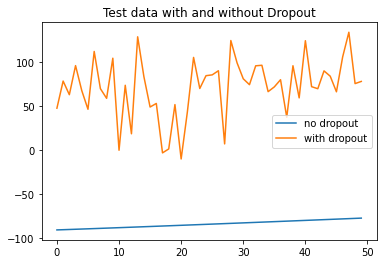

In [670]:
import matplotlib.pyplot as plt

plt.plot(testing_loss, label="no dropout")
plt.plot(testing_loss_d, label="with dropout")
plt.legend()
plt.title("Test data with and without Dropout")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pred, abcd,  test_size=0.5,  random_state = 16)

In [378]:
#Нейронная сеть для определения произносимой буквы

In [2335]:
class File(torch.nn.Module):
    def __init__(self):
        super(File, self).__init__()
        
        self.fc1 = torch.nn.Linear(40,4)
        self.relu2 = torch.nn.PReLU() 
        self.conv2 = nn.Conv1d(4, 4, 4, bias=False)
        self.conv1 = nn.Conv1d(4, 4, 1, bias=False)
        self.pool2 = nn.MaxPool1d(1, 2)     
        self.fc2 = torch.nn.Linear(1,1)
        
        
    def forward(self, x):

        x = self.fc1(x)             
        x = self.relu2(self.conv2(x))
        x = self.pool2(x)
        x = self.relu2(self.conv1(x))
        x = self.fc2(x)
        return x
    
neur = File()
pred = neur(X_train)
print(len(pred))


print(len(pred[0]))
print(pred)

4
1
tensor([[-3.0002],
        [-2.7142],
        [-3.6547],
        [-3.2571]], grad_fn=<AddmmBackward0>)


In [2336]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [2337]:
from torch import optim
learning_rate = 0.01
# Осуществляем оптимизацию путем стохастического градиентного спуска
optimizer = optim.Adadelta(neur.parameters(), lr=learning_rate)
# Создаем функцию потерь
criterion = nn.NLLLoss()
#criterion = nn.CrossEntropyLoss()

In [2338]:
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import hamming_loss
from sklearn import metrics

In [2339]:
def get_test_loss(net, criterion, data_loader):
    testing_loss = []
    with torch.no_grad():
        for data in data_loader:
            inputs, labels = data
            inputs, labels = X_test.to(device), y_test.to(device)
            outputs = neur(inputs)
            outputs = outputs.view(outputs.size(0)* outputs.size(1))
            labels = labels.type(torch.LongTensor)
            loss = criterion(outputs, labels)
            testing_loss.append(loss.item())
#            outputs = outputs.round()
#            score = hamming_loss(labels, np.round(abs(outputs)), normalize=False)
            score = accuracy_score(labels, np.round(abs(outputs)))
#            print(classification_report(labels, np.round(abs(outputs)), target_names=target_names))
#            print(classification_report(labels, np.round(abs(outputs)), labels))
    
#            score = accuracy_score(labels, outputs)
    return sum(testing_loss) / len(testing_loss), score
#    return  score
def get_score(labels, outputs):
            outputs = outputs.detach().numpy()
            score = accuracy_score(labels, outputs)
            return score

In [2341]:
training_loss_d, testing_loss_d = [], []
running_loss = []
i = 0
for epoch in range(50):
    for data in train_dataloader:
        inputs, labels = data
        inputs, labels = X_train.to(device), y_train.to(device)

        optimizer.zero_grad()
        outputs = neur(inputs)
        outputs = outputs.view(outputs.size(0)* outputs.size(1))
        #outputs = outputs[:-1]
        labels = labels.type(torch.LongTensor)
        loss = criterion(outputs, labels)
        loss.backward()
#        outputs = outputs.round()
#        labels = labels.round()
#        outputs = outputs.detach().numpy()
#        yy_train_t = yy_train_t.detach().numpy()
#        score = accuracy_score(labels, outputs)
        optimizer.step()
        running_loss.append(loss.item())
        i += 1
        if i % 1 == 0:
            avg_train_loss = sum(running_loss) / len(running_loss)
            avg_test_loss, avg_test_score = get_test_loss(neur, criterion, valid_dataloader)
            running_loss.clear()
            training_loss_d.append(avg_train_loss)
            testing_loss_d.append(avg_test_loss)
            print(f"[{epoch:2d}] [it={i:5d}] Train Loss: {avg_train_loss:.3f}, Test Loss: {avg_test_loss:.3f}",'hamming Test: ', avg_test_score)

#print("Done training.")

[ 0] [it=    1] Train Loss: 0.998, Test Loss: 2.150 hamming Test:  0.5
[ 1] [it=    2] Train Loss: 0.970, Test Loss: 2.126 hamming Test:  0.5
[ 2] [it=    3] Train Loss: 0.935, Test Loss: 2.101 hamming Test:  0.5
[ 3] [it=    4] Train Loss: 0.899, Test Loss: 2.077 hamming Test:  0.5
[ 4] [it=    5] Train Loss: 0.867, Test Loss: 2.036 hamming Test:  0.5
[ 5] [it=    6] Train Loss: 0.838, Test Loss: 2.012 hamming Test:  0.5
[ 6] [it=    7] Train Loss: 0.803, Test Loss: 1.988 hamming Test:  0.5
[ 7] [it=    8] Train Loss: 0.767, Test Loss: 1.963 hamming Test:  0.75
[ 8] [it=    9] Train Loss: 0.735, Test Loss: 1.923 hamming Test:  0.75
[ 9] [it=   10] Train Loss: 0.706, Test Loss: 1.898 hamming Test:  0.75
[10] [it=   11] Train Loss: 0.670, Test Loss: 1.873 hamming Test:  0.75
[11] [it=   12] Train Loss: 0.634, Test Loss: 1.849 hamming Test:  0.75
[12] [it=   13] Train Loss: 0.601, Test Loss: 1.808 hamming Test:  0.75
[13] [it=   14] Train Loss: 0.572, Test Loss: 1.783 hamming Test:  0.75

In [2340]:
training_loss_d, testing_loss_d = [], []
running_loss = []
i = 0
for epoch in range(50): 
    for data in train_dataloader:
        inputs, labels = data
        inputs, labels = X_train.to(device), y_train.to(device)

        optimizer.zero_grad()
        outputs = neur(inputs)
        outputs = outputs.view(outputs.size(0)* outputs.size(1))
        #outputs = outputs[:-1]
        labels = labels.type(torch.LongTensor)
        loss = criterion(outputs, labels)
        loss.backward()
#        outputs = outputs.round()
#        labels = labels.round()
#        outputs = outputs.detach().numpy()
#        yy_train_t = yy_train_t.detach().numpy()
#        score = accuracy_score(labels, outputs)
        optimizer.step()
        running_loss.append(loss.item())
        i += 1
        if i % 1 == 0:
            avg_train_loss = sum(running_loss) / len(running_loss)
            avg_test_loss, avg_test_score = get_test_loss(neur, criterion, valid_dataloader)
            running_loss.clear()
            training_loss_d.append(avg_train_loss)
            testing_loss_d.append(avg_test_loss)
            print(f"[{epoch:2d}] [it={i:5d}] Train Loss: {avg_train_loss:.3f}, Test Loss: {avg_test_loss:.3f}",'hamming Test: ', avg_test_score)

#print("Done training.")

[ 0] [it=    1] Train Loss: 2.714, Test Loss: 3.595 hamming Test:  0.5
[ 1] [it=    2] Train Loss: 2.668, Test Loss: 3.559 hamming Test:  0.5
[ 2] [it=    3] Train Loss: 2.621, Test Loss: 3.523 hamming Test:  0.5
[ 3] [it=    4] Train Loss: 2.573, Test Loss: 3.486 hamming Test:  0.25
[ 4] [it=    5] Train Loss: 2.525, Test Loss: 3.449 hamming Test:  0.5
[ 5] [it=    6] Train Loss: 2.476, Test Loss: 3.412 hamming Test:  0.5
[ 6] [it=    7] Train Loss: 2.427, Test Loss: 3.375 hamming Test:  0.5
[ 7] [it=    8] Train Loss: 2.378, Test Loss: 3.337 hamming Test:  0.5
[ 8] [it=    9] Train Loss: 2.329, Test Loss: 3.299 hamming Test:  0.5
[ 9] [it=   10] Train Loss: 2.282, Test Loss: 3.277 hamming Test:  0.5
[10] [it=   11] Train Loss: 2.255, Test Loss: 3.239 hamming Test:  0.5
[11] [it=   12] Train Loss: 2.227, Test Loss: 3.217 hamming Test:  0.5
[12] [it=   13] Train Loss: 2.195, Test Loss: 3.195 hamming Test:  0.5
[13] [it=   14] Train Loss: 2.163, Test Loss: 3.173 hamming Test:  0.5
[14] 

In [2303]:
training_loss_d, testing_loss_d = [], []
running_loss = []
i = 0
for epoch in range(50): # 10 epochs
    for data in train_dataloader:
        inputs, labels = data
        inputs, labels = X_train.to(device), y_train.to(device)

        optimizer.zero_grad()
        outputs = neur(inputs)
        outputs = outputs.view(outputs.size(0)* outputs.size(1))
        #outputs = outputs[:-1]
        labels = labels.type(torch.LongTensor)
        loss = criterion(outputs, labels)
        loss.backward()
#        outputs = outputs.round()
#        labels = labels.round()
#        outputs = outputs.detach().numpy()
#        yy_train_t = yy_train_t.detach().numpy()
#        score = accuracy_score(labels, outputs)
        optimizer.step()
        running_loss.append(loss.item())
        i += 1
        if i % 1 == 0:
            avg_train_loss = sum(running_loss) / len(running_loss)
            avg_test_loss, avg_test_score = get_test_loss(neur, criterion, valid_dataloader)
            running_loss.clear()
            training_loss_d.append(avg_train_loss)
            testing_loss_d.append(avg_test_loss)
            print(f"[{epoch:2d}] [it={i:5d}] Train Loss: {avg_train_loss:.3f}, Test Loss: {avg_test_loss:.3f}",'hamming Test: ', avg_test_score)

#print("Done training.")

[ 0] [it=    1] Train Loss: -7.340, Test Loss: -2.500 hamming Test:  1.0
[ 1] [it=    2] Train Loss: -7.396, Test Loss: -2.536 hamming Test:  0.75
[ 2] [it=    3] Train Loss: -7.453, Test Loss: -2.572 hamming Test:  0.75
[ 3] [it=    4] Train Loss: -7.510, Test Loss: -2.609 hamming Test:  0.75
[ 4] [it=    5] Train Loss: -7.567, Test Loss: -2.646 hamming Test:  0.75
[ 5] [it=    6] Train Loss: -7.625, Test Loss: -2.683 hamming Test:  0.75
[ 6] [it=    7] Train Loss: -7.683, Test Loss: -2.721 hamming Test:  0.75
[ 7] [it=    8] Train Loss: -7.743, Test Loss: -2.759 hamming Test:  0.75
[ 8] [it=    9] Train Loss: -7.802, Test Loss: -2.798 hamming Test:  0.75
[ 9] [it=   10] Train Loss: -7.862, Test Loss: -2.837 hamming Test:  0.75
[10] [it=   11] Train Loss: -7.923, Test Loss: -2.876 hamming Test:  0.75
[11] [it=   12] Train Loss: -7.985, Test Loss: -2.916 hamming Test:  0.75
[12] [it=   13] Train Loss: -8.047, Test Loss: -2.956 hamming Test:  0.5
[13] [it=   14] Train Loss: -8.109, Test